In [30]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
df = pd.read_csv('Elon_musk.csv', encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [33]:
# Clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

In [34]:
df['Clean_Text'] = df['Text'].apply(clean_text)

In [35]:
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [36]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]
    return ' '.join(stemmed_tokens)

In [37]:
df['Clean_Text'] = df['Clean_Text'].apply(tokenize_and_lemmatize)


In [38]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Clean_Text'])

In [10]:
# Sentiment Analysis using TF-IDF
sia = SentimentIntensityAnalyzer()

In [11]:
# Calculate sentiment scores based on TF-IDF weighted features
sentiment_scores = []
for i in range(len(df)):
    text = df['Clean_Text'][i]
    tfidf_weights = tfidf_matrix[i].toarray().flatten()
    sentiment_score = sia.polarity_scores(text)
    weighted_sentiment_score = {key: sentiment_score[key] * tfidf_weights.mean() for key in sentiment_score}
    sentiment_scores.append(weighted_sentiment_score)

In [12]:
df['Sentiment_Scores'] = sentiment_scores

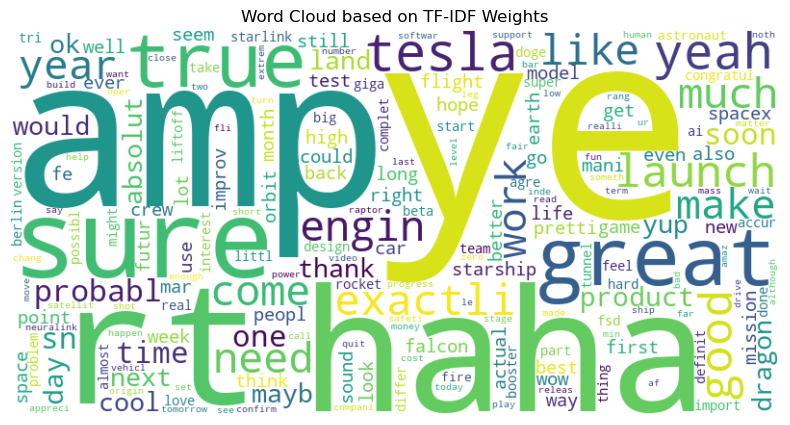

In [13]:

# Visualization - Word Cloud based on TF-IDF weighted terms
tfidf_features = tfidf.get_feature_names_out()
tfidf_weights = tfidf_matrix.sum(axis=0).A1
wordcloud_weights = {tfidf_features[i]: tfidf_weights[i] for i in range(len(tfidf_features))}
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(wordcloud_weights)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF Weights')
plt.show()

In [14]:
# Print dataframe with sentiment scores
print(df[['Text', 'Sentiment_Scores']])

                                                   Text  \
0                                @kunalb11 Im an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                       Sentiment_Scores  
0     {'neg': 0.0, 'neu': 0.00034411562284927734, 'p...  
1     {'neg': 0.0, 'neu': 0.0008993350871699655, 'po...  
2     {'neg': 0.0, 'neu': 9.268487397143017e-05, 'po...  
3     {'neg': 0.0, 'neu': 0.0004839874486302632, 'po...  
4

In [15]:
# Initialize counters for sentiment components
neg_count = 0
neu_count = 0
pos_count = 0

In [16]:
# Iterate through each tweet
for index, row in df.iterrows():
    # Extract sentiment scores from the 'Sentiment_Scores' column
    sentiment_scores = row['Sentiment_Scores']
    
     # Increment the counters based on sentiment scores
    neg_count += sentiment_scores['neg']
    neu_count += sentiment_scores['neu']
    pos_count += sentiment_scores['pos']

In [27]:
# Calculate the total count of tweets
total_tweets = len(df)
total_tweets

1999

In [18]:
# Calculate the percentage distribution of sentiment components
neg_percentage = (neg_count / total_tweets) * 100
neu_percentage = (neu_count / total_tweets) * 100
pos_percentage = (pos_count / total_tweets) * 100

In [19]:
# Print the results
print("Negative Sentiment Percentage:", neg_percentage)
print("Neutral Sentiment Percentage:", neu_percentage)
print("Positive Sentiment Percentage:", pos_percentage)

Negative Sentiment Percentage: 0.002877570735075258
Neutral Sentiment Percentage: 0.05385046686386131
Positive Sentiment Percentage: 0.011627395506231156
